<a href="https://colab.research.google.com/github/android-kunjapppan/Fast-AI/blob/master/fast_ai_lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* fast_ai sits on top of pytorch1.0
* fast_ai supports 
  1. computer vision
  2. Natural language Text
  3. Tabular data
  4. colloborative filtering

In [17]:
import warnings
warnings.filterwarnings('ignore')

from fastai import *
from fastai.vision import *

In [18]:
# we can use URL as an argument and which will download and extract the data
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [19]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [20]:
path = untar_data(URLs.PETS)

path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [21]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [22]:
path_anno = path/'annotations'
path_img = path/'images'

In [23]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_20.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_88.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_30.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_72.jpg')]

In [24]:
# we can see that the labels are part of the file names. we should take out the file names  and make them as labels
# we will do it using ImageDataBunch.from_name_re()

help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path:Union[pathlib.Path, str], fnames:Collection[pathlib.Path], pat:str, valid_pct:float=0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [25]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [26]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)

# we should make our data about the same size
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boxer,Egyptian_Mau,pomeranian,Russian_Blue,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,american_bulldog,Abyssinian,american_bulldog,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

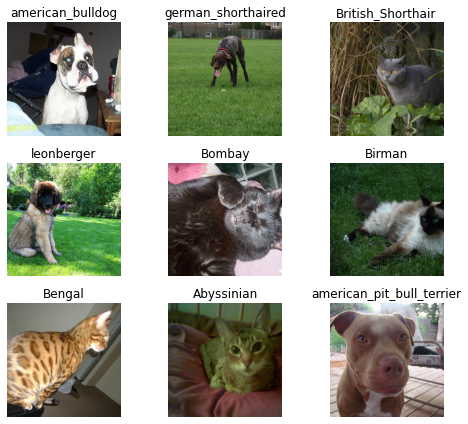

In [27]:
data.show_batch(rows =3, figsize =(7,6))

In [28]:
print(data.classes)
len(data.classes),data.c # 'c' is for number of classes

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training: resnet34

In [29]:
# create_cnn will create Convolution Neural Network
# ResNet works extremely well nearly over time
# Here we're using Transfer Learning
learn = create_cnn(data, models.resnet34,metrics= error_rate)

In [30]:
# fit_one_cycle works better than fit
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.301619,0.384343,0.119756,01:21
1,0.586032,0.329813,0.097429,01:21
2,0.373017,0.317812,0.096076,01:21
3,0.260988,0.280557,0.077808,01:22


In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [33]:
learn.save('stage-1')

# Results:
let's see what results we've got

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

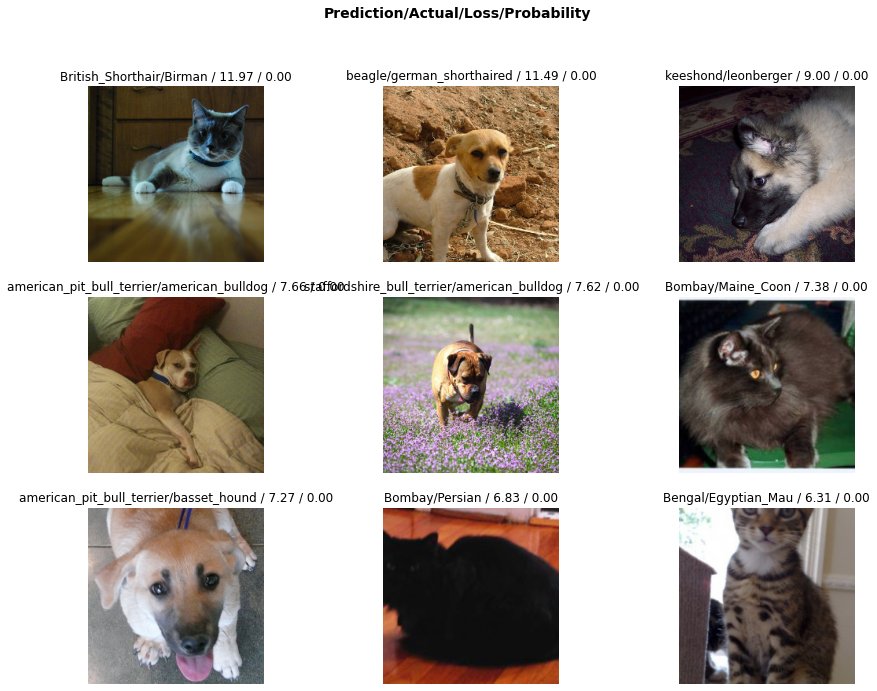

In [36]:
interp.plot_top_losses(9,figsize=(15,11))

In [37]:
doc(interp.plot_top_losses)

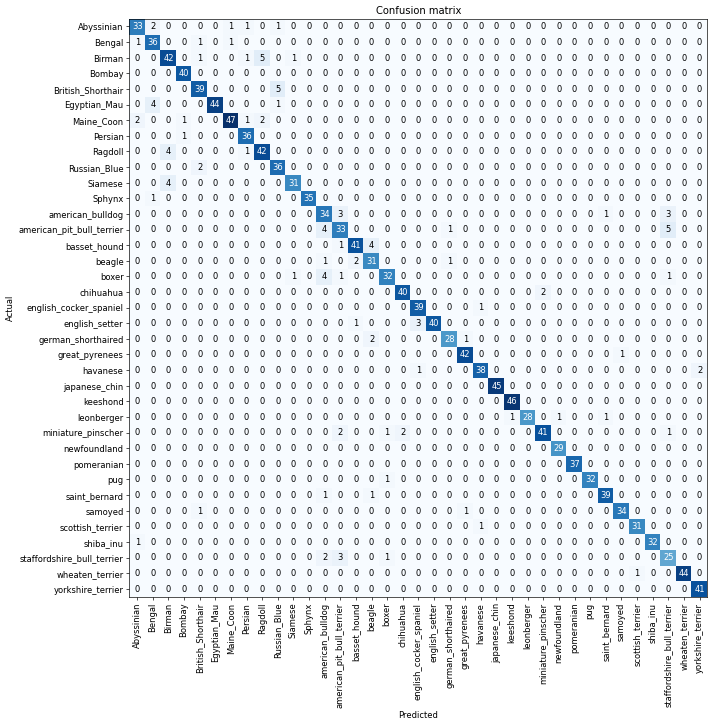

In [39]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [40]:
interp.most_confused(min_val =2)

[('Birman', 'Ragdoll', 5),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('Siamese', 'Birman', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('basset_hound', 'beagle', 4),
 ('boxer', 'american_bulldog', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Maine_Coon', 'Abyssinian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('beagle', 'basset_hound', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('german_shorthaired', 'beagle', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bul

# UnFreezing, Fine-Tuning, and Learning rates

* Since our model is working as we expect it to do. we will UNFREEZE our model adn train some more

In [41]:
learn.unfreeze()

In [42]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.669175,0.455229,0.135318,01:28


In [44]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boxer,Egyptian_Mau,pomeranian,Russian_Blue,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,american_bulldog,Abyssinian,american_bulldog,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3),

In [45]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


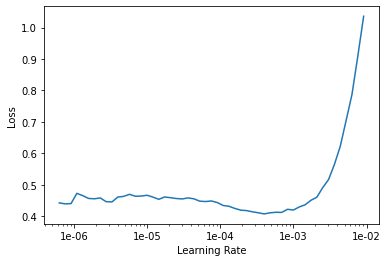

In [46]:
learn.recorder.plot()

In [47]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.331840,0.372366,0.112314,01:28
1,0.246653,0.325783,0.101489,01:26
